**Agata Semerjak**, 402426  
gr 3a, środa 17:00

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit']) #loading the data

## Linear regression with one variable

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


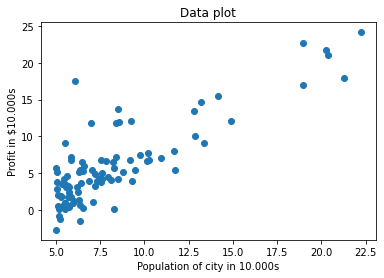

In [5]:
plt.scatter(data['Population'], data['Profit']) #plotting the data
plt.title("Data plot")
plt.xlabel("Population of city in 10.000s")
plt.ylabel("Profit in $10.000s")
plt.show()

In [6]:
data.insert(0, 'Ones', np.ones(len(data))) #adding column of ones at the beggining
data.head()

,Ones,Population,Profit
0,1.0,6.1101,17.5920
1,1.0,5.5277,9.1302
2,1.0,8.5186,13.6620
3,1.0,7.0032,11.8540
4,1.0,5.8598,6.8233


In [7]:
X = data.drop(['Profit'], axis=1) #separating independent variables
y = data[['Profit']] #separating dependent variable
print(X.head(), "\n")
print(y.head())

   Ones  Population
0   1.0      6.1101
1   1.0      5.5277
2   1.0      8.5186
3   1.0      7.0032
4   1.0      5.8598 

    Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


In [8]:
X = np.matrix(X.values) #converting dfs to matrixes
y = np.matrix(y.values)
theta = np.matrix(np.array([[0], [0]])) #initializing theta

In [9]:
def computeCost(X, y, theta):
    m = len(X)
    h = X @ theta
    J = 1/(2*m) * np.sum(np.power((h - y), 2))
    return J

computeCost(X, y, theta) #computing cost for zero theta

32.072733877455676

In [10]:
def simple_gradient(X, y, theta, alpha, it):
    m = len(X)
    cost_history = []

    for j in range(it):
      theta = theta - alpha/m * (X.T @ (X @ theta - y)) #updating theta
      cost_history.append(computeCost(X, y, theta)) #saving every cost

    cost = computeCost(X, y, theta) #computing the final cost
    return theta, cost, cost_history

better_theta, cost, cost_history = simple_gradient(X, y, theta, 0.01, 1000) #running simple gradient method on our data
print("Wartości współczynników theta:", better_theta.T,"\nWartość funkcji kosztu:              ", cost)

Wartości współczynników theta: [[-3.24140214  1.1272942 ]] 
Wartość funkcji kosztu:               4.515955503078914


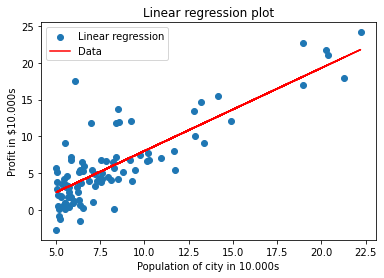

In [11]:
plt.scatter(data['Population'], data['Profit']) #plotting the data
plt.plot(X[:, 1], X*better_theta, 'r') #plotting the linear regression result
plt.legend(["Linear regression", "Data"])
plt.title("Linear regression plot")
plt.xlabel("Population of city in 10.000s")
plt.ylabel("Profit in $10.000s")
plt.show()

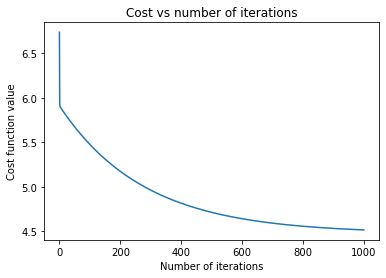

In [12]:
plt.plot(cost_history) #plotting the relationship between number of iterations and cost function
plt.title("Cost vs number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost function value")
plt.show()

## Linear regression with multiple variables

In [13]:
path = os.getcwd() + '/ex1data2.txt' #loading the data
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [14]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [15]:
def normalize(X):
  meanx = X.mean(axis=0) #computing mean of each column
  sigmax = X.std(axis=0) #computing std for each column
  X_normalized = np.multiply((X - meanx), 1/sigmax) #normalizing the data
  return meanx, sigmax, X_normalized

In [16]:
X = data2.drop(['Price'], axis=1) #separating independent variables
y = data2[['Price']] #separating dependent variable
print(X.head(), "\n")
print(y.head())

   Size  Bedrooms
0  2104         3
1  1600         3
2  2400         3
3  1416         2
4  3000         4 

    Price
0  399900
1  329900
2  369000
3  232000
4  539900


In [17]:
meanx, sigmax, X_norm = normalize(X) #normalizing data
X_norm.insert(0, 'Ones', np.ones(len(X_norm))) #adding column of ones at the beggining
X_norm.head()

,Ones,Size,Bedrooms
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


In [18]:
X = np.matrix(X_norm.values) #converting dfs to matrixes
y = np.matrix(y.values)

In [19]:
theta = np.matrix(np.array([[0], [0], [0]])) #initializing theta
computeCost(X, y, theta) #computing cost for zero theta

65591548106.45744

In [20]:
better_theta, cost, cost_history = simple_gradient(X, y, theta, 0.01, 1000) #running simple gradient on another dataset
print("Wartości współczynników theta:", better_theta.T,"\nWartość funkcji kosztu:              ", cost)

Wartości współczynników theta: [[340397.96353532 109848.00846026  -5866.45408497]] 
Wartość funkcji kosztu:               2043544218.7812896


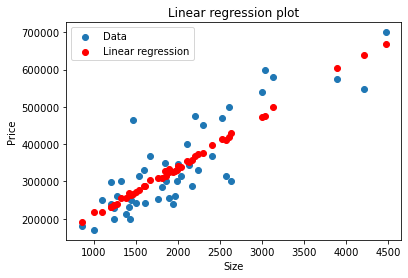

In [21]:
X1_unnorm = X[:, 1].reshape(47).tolist()[0] #converting data to list (more useful type for the next operation)
X1_unnorm =  [elem * sigmax[0] + meanx[0] for elem in X1_unnorm] #reversing the normalization

yplot = (X*better_theta).reshape(47).tolist()[0]
#yplot1 = [elem * float(better_theta[0]) + float(better_theta[2][0]) for elem in data2.drop(['Price'], axis=1).values]
plt.scatter(X1_unnorm, list(y)) #plotting the data
plt.scatter(X1_unnorm, yplot, c='r')
plt.legend(["Data", "Linear regression"])
plt.title("Linear regression plot")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

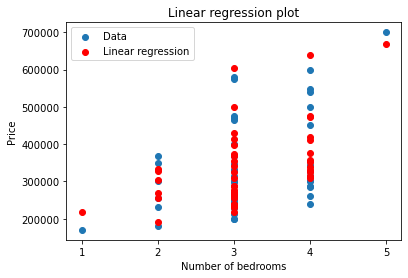

In [22]:
X2_unnorm = X[:, 2].reshape(47).tolist()[0] #converting data to list
X2_unnorm =  [elem * sigmax[1] + meanx[1] for elem in X2_unnorm] #reversing the normalization
#yplot = [elem * float(better_theta[1]) + float(better_theta[2][0]) for elem in X2_unnorm]
yplot = (X*better_theta).reshape(47).tolist()[0]
plt.scatter(X2_unnorm, list(y)) #plotting the data
plt.scatter(X2_unnorm, yplot, c='r')
plt.legend(["Data", "Linear regression"])
plt.title("Linear regression plot")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

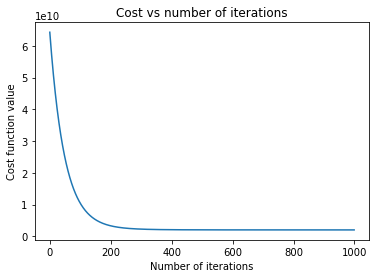

In [23]:
plt.plot(cost_history) #plotting the relationship between number of iterations and cost function
plt.title("Cost vs number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost function value")
plt.show()

## Linear regression - Python packages

In [24]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Data import
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target
 
# Normalization
meanx3, sigmax3, X_norm = normalize(boston_X)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\agaxx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [25]:
# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(X_norm, boston_Y, test_size=0.3)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
y_pred = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-1.05618765  0.82926042  0.32194328  0.68227379 -2.20183074  2.36218156
 -0.02291166 -3.22321813  3.34837911 -2.70400011 -2.27328446  0.86926557
 -3.94243634]
Residual sum of squares: 15.474589574049753


In [26]:
import sklearn
print("Średni błąd bezwzględny (MAE) = ", sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Błąd średniokwadratowy (MSE)) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Pierwiastek błędu średniokwadratowego (RMSE) = ", sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Średni błąd bezwzględny (MAE) =  2.9806123930893222
Błąd średniokwadratowy (MSE)) =  15.474589574049753
Pierwiastek błędu średniokwadratowego (RMSE) =  3.933775485973971


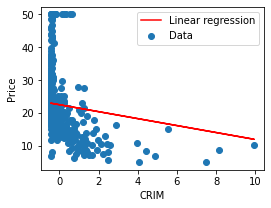

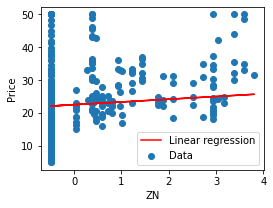

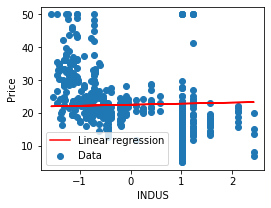

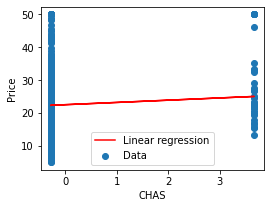

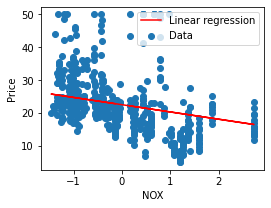

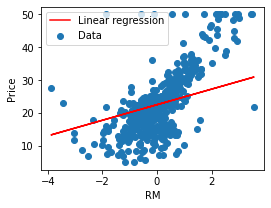

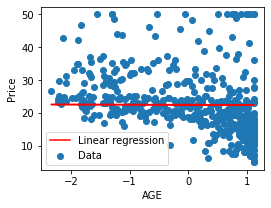

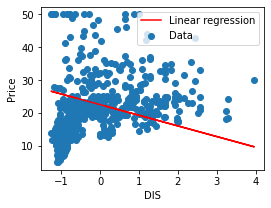

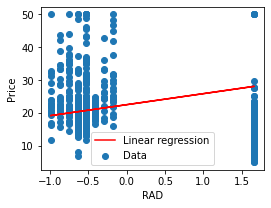

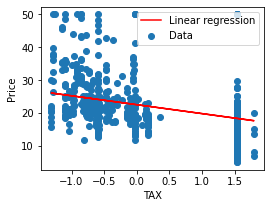

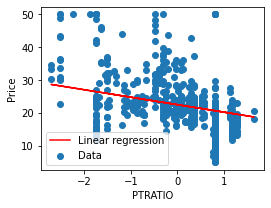

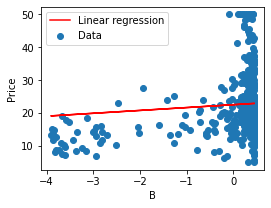

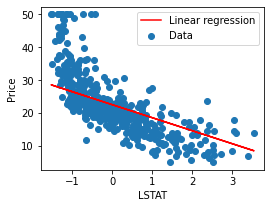

In [27]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    _a,_b, xplot = normalize(boston.data[:, index])
    yplot = xplot*regr.coef_[index] + regr.intercept_
    plt.plot(xplot, yplot, 'r')
    plt.scatter(xplot, boston.target)
    plt.legend(["Linear regression", "Data"])
    plt.plot()
    plt.ylabel('Price')
    plt.xlabel(feature_name)


## Additional

In [28]:
boston_X = boston.data
boston_Y = boston.target

meanx3, sigmax3, X_norm = normalize(boston_X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, boston_Y, test_size=0.3)

regr = linear_model.Ridge(alpha = .5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))
print("Średni błąd bezwzględny (MAE) = ", sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Błąd średniokwadratowy (MSE)) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Pierwiastek błędu średniokwadratowego (RMSE) = ", sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Coefficients: 
 [-0.8373882   1.07025509 -0.0945876   0.37743903 -2.25793983  2.53977512
  0.08894516 -3.0159898   2.80067063 -2.43929036 -1.97387823  0.78904829
 -3.46329635]
Residual sum of squares: 22.81865889672682
Średni błąd bezwzględny (MAE) =  2.9857246114976217
Błąd średniokwadratowy (MSE)) =  22.81865889672682
Pierwiastek błędu średniokwadratowego (RMSE) =  4.776887992901531


In [29]:
regr = linear_model.Lasso(alpha = 5.1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))
print("Średni błąd bezwzględny (MAE) = ", sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Błąd średniokwadratowy (MSE)) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Pierwiastek błędu średniokwadratowego (RMSE) = ", sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Coefficients: 
 [-0.          0.         -0.          0.         -0.          0.08213515
 -0.          0.         -0.         -0.         -0.          0.
 -1.7649498 ]
Residual sum of squares: 62.995679776139326
Średni błąd bezwzględny (MAE) =  5.237105923337216
Błąd średniokwadratowy (MSE)) =  62.995679776139326
Pierwiastek błędu średniokwadratowego (RMSE) =  7.936981780005503


In [30]:
regr = linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))
print("Średni błąd bezwzględny (MAE) = ", sklearn.metrics.mean_absolute_error(y_test, y_pred))
print("Błąd średniokwadratowy (MSE)) = ", sklearn.metrics.mean_squared_error(y_test, y_pred))
print("Pierwiastek błędu średniokwadratowego (RMSE) = ", sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False))

Coefficients: 
 [-0.37608791  0.28044722 -0.43406956  0.30445706 -0.70127746  2.6199448
 -0.         -0.80943626  0.         -0.51327203 -1.34134712  0.60548596
 -2.60775404]
Residual sum of squares: 27.857574204572476
Średni błąd bezwzględny (MAE) =  3.2551659207420376
Błąd średniokwadratowy (MSE)) =  27.857574204572476
Pierwiastek błędu średniokwadratowego (RMSE) =  5.278027491835608
